# Exploratory Data Analysis and WordCloud Creation
This notebook analyzes bbm_tweets_oct4-9.csv and mainly aims to show publicly available historical data of users and top languages, usernames, words and hashtags used.

**DISCLAIMER:** Some tweets may not reflect here due to privacy restrictions of Twitter profiles. The datetime used is based on the Coordinated Universal Time (UTC).

**INSIGHTS BASED ON SCRAPED DATA FROM OCT. 4-9:**
- First tweet with hashtag of #BBMIsMyPresident2022 came from 'goodspeedshem' at 2021-10-04 11:50:01+00:00 (UTC)
- There are total of 25,366 tweets containing #BBMIsMyPresident2022
- Mixed is the most used language (machine generated, assumed language of the tweet) at 9,183 tweets
- Peak date is 2021-10-05 with 13,971 tweets
- 'maharlika001' has the most number of tweets containing the hashtag (501 tweets) 
- 'ABSCBNNews' has the most number of tweets of a verified user containing the hashtag at (1 tweet)
- Most tweets came from accounts created in 2021 (11,860 tweets)
- More insights and visualizations below

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

all_tweets_df = pd.read_csv("bbm_tweets_oct4-9.csv")

In [5]:
all_tweets_df.head()

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
0,0,2021-10-04 23:22:00+00:00,#BBMIsMyPresident2022,und,angelsantos28,False,2010-01-28 12:39:43+00:00,14,99,NaN
1,1,2021-10-04 23:21:12+00:00,Magtweet na ba ako! Di na ako makapag hintay ....,tl,01Juday,False,2021-09-10 15:48:39+00:00,148,281,NaN
2,2,2021-10-04 12:38:17+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,ferido_tobias,False,2021-09-26 02:39:02+00:00,9,56,NaN
3,3,2021-10-04 12:31:38+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,JohnVillamonte,False,2021-10-04 05:12:27+00:00,3,19,NaN
4,4,2021-10-04 11:50:01+00:00,"Kong ang kabataan ang Pag-asa ng bayan, Si Bon...",tl,goodspeedshem,False,2019-08-08 11:43:37+00:00,13,5,NaN


In [6]:
all_tweets_df.shape

(25366, 10)

In [7]:
all_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25366 entries, 0 to 25365
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      25366 non-null  int64 
 1   Datetime        25366 non-null  object
 2   Text            25366 non-null  object
 3   Language        25366 non-null  object
 4   Username        25366 non-null  object
 5   Verified        25366 non-null  bool  
 6   AccountCreated  25366 non-null  object
 7   Followers       25366 non-null  int64 
 8   Following       25366 non-null  int64 
 9   MentionedUsers  6470 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 1.8+ MB


In [8]:
all_tweets_df["Language"].value_counts()

# und - can be mixed languages (ex: taglish)

und    9183
tl     9033
en     6245
in      431
es      169
ht       76
it       39
fr       24
et       23
eu       21
ja       17
pt       17
cy       13
pl       11
no        8
hu        8
nl        7
sv        7
ca        5
sl        5
da        4
hi        4
fi        3
cs        3
ko        2
lv        2
ro        2
de        2
lt        1
vi        1
Name: Language, dtype: int64

Text(0, 0.5, '')

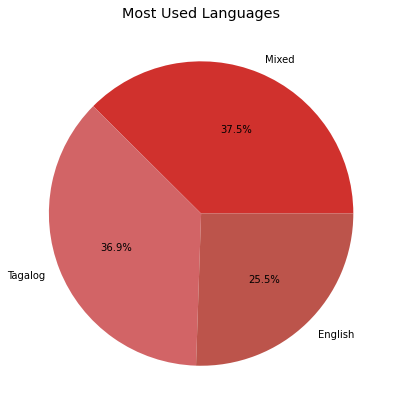

In [17]:
all_tweets_df["Language"].value_counts().head(3).plot(kind="pie", labels=["Mixed", "Tagalog", "English"], autopct="%.1f%%",
                                                     colors=["#D0312D", "#D26466", "#BC544B"], title="Most Used Languages",
                                                     figsize=(7,7))
plt.ylabel("")

In [71]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts()

5    13971
6     6160
7     3982
8     1247
4        6
Name: Datetime, dtype: int64

([<matplotlib.axis.XTick at 0x15293ffdd00>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

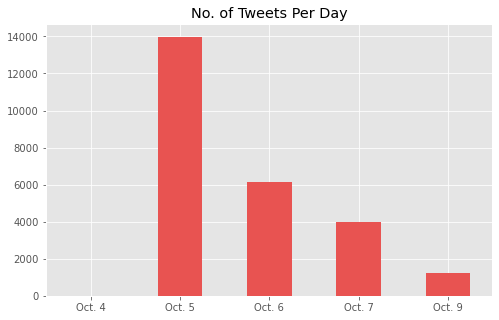

In [45]:
pd.DatetimeIndex(all_tweets_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#e85351", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 9"], rotation=0)

In [72]:
all_tweets_df["Username"].value_counts().head(10)

maharlika001       501
loyalista24        235
01Juday            199
hearticedc         180
axeldijanabilar    169
Rbu48K             160
AllenReyFernan1    151
chard_maine2016    143
itsysabellaaa      143
SolidBBM           142
Name: Username, dtype: int64

<AxesSubplot:title={'center':'Top Usernames with Most Tweets'}>

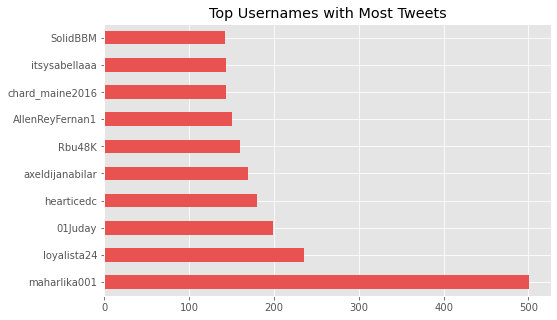

In [46]:
all_tweets_df["Username"].value_counts().head(10).plot(kind="barh", color="#e85351", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))

In [40]:
all_tweets_df.loc[all_tweets_df["Verified"] == True, "Username"].value_counts()

ABSCBNNews    1
Name: Username, dtype: int64

In [39]:
all_tweets_df.loc[all_tweets_df["Verified"] == True]["Text"]

6988    #NeverAgain, #MarcosMagnanakaw VS #BBMIsMyPres...
Name: Text, dtype: object

In [41]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index()

2007        5
2008       10
2009      722
2010      996
2011      526
2012      582
2013      491
2014      503
2015      749
2016     1282
2017     1067
2018      984
2019     1526
2020     4063
2021    11860
Name: AccountCreated, dtype: int64

([<matplotlib.axis.XTick at 0x152940e2f10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

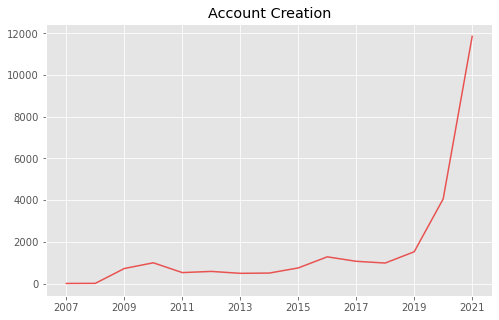

In [47]:
pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year.value_counts().sort_index().plot(color="#e85351", 
                                                                                        title="Account Creation",
                                                                                        figsize=(8,5))
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])

## Criteria Initialization
- Tweet from 2021-10-04 to 2021-10-09
- Hashtag #BBMIsMyPresident2022 is used
- Number of Following is greater than number of Followers
- Account created after 2018
- Number of Followers less than 100
- Account not Verified

In [48]:
criteria = (all_tweets_df["Following"] > all_tweets_df["Followers"]) & (pd.DatetimeIndex(all_tweets_df["AccountCreated"]).year > 2018) & (all_tweets_df["Followers"] < 100) & (all_tweets_df["Verified"] == False)

criteria_df = all_tweets_df.loc[criteria]

In [49]:
criteria_df

,Unnamed: 0,Datetime,Text,Language,Username,Verified,AccountCreated,Followers,Following,MentionedUsers
2,2,2021-10-04 12:38:17+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,ferido_tobias,False,2021-09-26 02:39:02+00:00,9,56,NaN
3,3,2021-10-04 12:31:38+00:00,#NeverAgain to Cheating\n#YesNaYesKayBBM\n#BBM...,en,JohnVillamonte,False,2021-10-04 05:12:27+00:00,3,19,NaN
9,9,2021-10-05 23:59:09+00:00,We already saw a widow cheat a Marcos twice. W...,en,WagBoboHa,False,2021-09-21 09:13:13+00:00,14,37,NaN
10,10,2021-10-05 23:59:08+00:00,#BBMIsMyPresident2022 go my president 💗💗✅,en,TenorioCess,False,2021-10-05 13:03:53+00:00,0,1,NaN
16,16,2021-10-05 23:58:03+00:00,#IskoIsMyPresident2022\n\nMy last resort is.\n...,en,QuaccWat,False,2020-05-25 01:47:10+00:00,36,161,NaN
...,...,...,...,...,...,...,...,...,...,...
25358,25358,2021-10-08 00:05:20+00:00,kaloka ung tweet ko kahapon umabot na sa kabil...,tl,spilldtruth,False,2021-10-04 17:22:46+00:00,46,79,NaN
25359,25359,2021-10-08 00:04:17+00:00,#BBMIsMyPresident2022 #solidregion3🙏🙏🙏🙏 https:...,und,lalicon_anne,False,2021-10-07 15:29:50+00:00,55,100,NaN
25360,25360,2021-10-08 00:03:42+00:00,Good morning! hoping for a great news sa last ...,en,spilldtruth,False,2021-10-04 17:22:46+00:00,46,79,NaN
25364,25364,2021-10-08 00:00:25+00:00,hypocrites\nas if hnd Yan sinasabi ng parents ...,tl,ReveCenona,False,2021-10-05 10:43:29+00:00,54,167,NaN


## Criteria-based Analysis

([<matplotlib.axis.XTick at 0x15291f9c100>,
 [Text(0, 0, 'Oct. 4'),
  Text(1, 0, 'Oct. 5'),
  Text(2, 0, 'Oct. 6'),
  Text(3, 0, 'Oct. 7'),
  Text(4, 0, 'Oct. 9')])

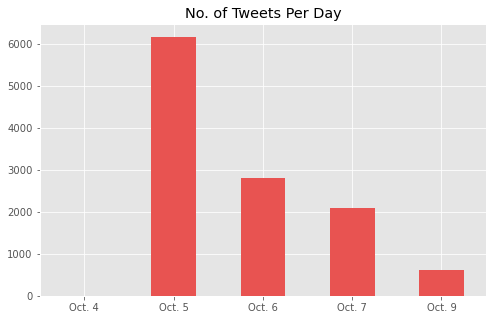

In [50]:
pd.DatetimeIndex(criteria_df["Datetime"]).day.value_counts().sort_index().plot(kind="bar", color="#e85351", 
                                                                                 title="No. of Tweets Per Day", figsize=(8,5))
plt.xticks(ticks=range(5), labels=["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 9"], rotation=0)

(0.0, 185.0)

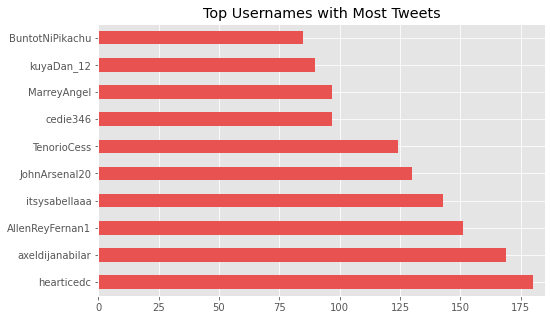

In [53]:
criteria_df["Username"].value_counts().head(10).plot(kind="barh", color="#e85351", 
                                                       title="Top Usernames with Most Tweets", figsize=(8,5))
plt.xlim(0,185)

## WordCloud - Most used words & hashtags (Whole)

In [54]:
import nltk
from nltk.tokenize import word_tokenize

all_words = []

for i in all_tweets_df["Text"]:
    tokenized_words = word_tokenize(i)
    for w in tokenized_words:   
        all_words.append(w.lower())

In [55]:
from nltk.corpus import stopwords

fil_stopwords = ["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang"]

eng_stopwords = stopwords.words("english")

# removed # to include hashtags
special_chars = [".", ",", "!", "@", "%", "&", "*", "(", ")", "'", '""', "+", "=", "-", ";", ":", "?", "’", "'s", "...",
                 "https", "t", "co", "t co", "https t"]

In [74]:
all_words2 = []

for word in all_words:
    if (word in fil_stopwords) or (word in eng_stopwords) or (word in special_chars) or (word.startswith("/")):
        continue
    all_words2.append(word)

In [75]:
all_in_sentence = ""

for w in all_words2:
    all_in_sentence += w + " "
    
# all_in_sentence 

(-0.5, 799.5, 399.5, -0.5)

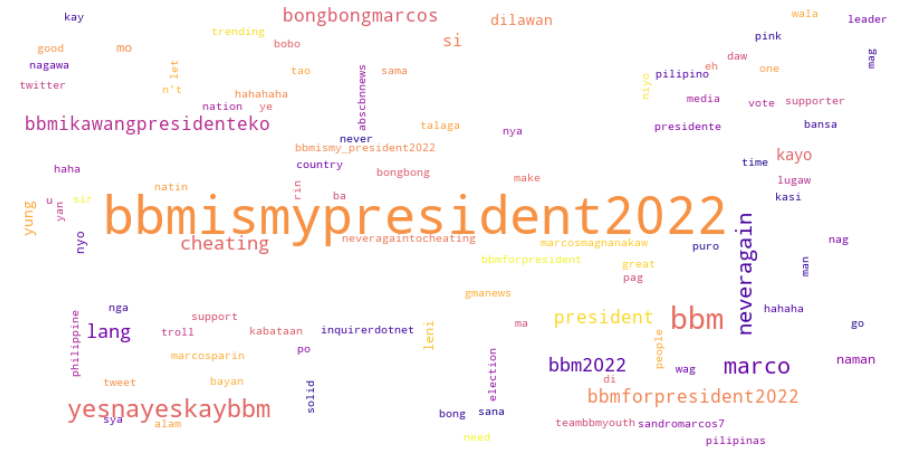

In [79]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=100, 
                       stopwords=[], collocations=False, colormap="plasma").generate(all_in_sentence)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")

## WordCloud - Most mentioned users (Whole)

In [62]:
from snscrape.modules.twitter import User

all_mentioned = []


for i in all_tweets_df["MentionedUsers"].fillna(0):
    if i == 0:
        continue
    
    all_mentioned.append(eval(i)[0].username)
    print(eval(i)[0].username)

inquirerdotnet
bongbongmarcos
acelight_
MiggySleepy
gmanews
WinstonRommel
achillestc
gmanews
gmanews
lamonista72
akosireekee
milkyway1969
gmanews
AlisonPereiraPH
ABSCBNNews
ianrobles_
DapatSiLeni
ABSCBNNews
inquirerdotnet
gmanews
bongbongmarcos
marcus5251962
MarreyAngel
gmanews
gmanews
gmanews
ABSCBNNews
TheDoctorLuck
gmanews
MarreyAngel
ABSCBNNews
milkyway1969
gmanews
ABSCBNNews
ABSCBNNews
1Sambayan
lenirobredo
BarundiaReyanne
sandromarcos7
kennethbeTrue
lamonista72
MJBautistaCPA
HaroldJamesGar2
bongbongmarcos
NovemberThird1
Makmak2207
ricovillapane
Roland03091979
ShaaWWie59
edgaralanpo
JohnMarkPetecio
Jendeukiilice1
KarenBecs
nixeily24
dlwrnctym
roginebiador
normsandrecio
bongbongmarcos
Katreng_03
jeffcanoy
hunterNim
ABSCBNNews
topsmam
j_vsor
hjdhjshj
TheJackForge
TisoyMDSays
justinejames_19
FanBoy_alipin
iamalizahbelle
akosireekee
gmanews
HaroldJamesGar2
MiggySleepy
ANCALERTS
FhqJackie
rick_joaquin
FhqJackie
airam_aseretSRK
bongbongmarcos
ABSCBNNews
John85073834
empresski_
smninews


fierylise
natoreyes
MiggySleepy
iyreen911
dlwrnctym
superkerv
gabpangilinan
bongbongmarcos
andy_crush
janinegutierrez
Gohlico
janinegutierrez
Gohlico
daksngbohol69
MarkMen2000
KaBertongTalak
PhilippineStar
inquirerdotnet
jcpunongbayan
kentoyamazakigf
ust_hiraya
FierceTita
Roxiferuel
natoreyes
docrjnaguit
luvsmenotx
kentoyamazakigf
GailOrante
IndaySabungera
ABSCBNNews
MarkMen2000
tammieboi
jennieimk_
FhqJackie
rapplerdotcom
gideonlasco
YamauchiElena
tammieboi
asjklmnop1234
kiaratorri
inquirerdotnet
inquirerdotnet
AllaEugene
BIENsays
Roxiferuel
not_turkish
gagaiiiii
conrado_balweg
ABSCBNNews
ThePaladin33
andy_crush
pee_noice
TedPylon
attyfrancis1
Sanggre_
jayeel_cornelio
bongbongmarcos
gabpangilinan
TheKejOfGlory
cartoonistzach
lagelimolala
shaaarmila
bongbongmarcos
shaaarmila
gideonlasco
Roxiferuel
rapplerdotcom
inquirerdotnet
iskonglasalista
rapplerdotcom
BBMmalakas
inquirerdotnet
bongbongmarcos
bongbongmarcos
Rosean_Asuncion
LibraQu71813876
rapplerdotcom
donnypangilinan
EvilWickedWitc

macoyspatrol
Sandra_Aquino27
not_turkish
k3lv1nNcelcius
kapuso_denise
gnvrgs
PhilstarNews
KarenBecs
barrett_cal50
ChelseaDar16
TeamBBMyouth
Sandra_Aquino27
katnissevarlyn
manongmoferdie
MJBautistaCPA
katnissevarlyn
katnissevarlyn
rapplerdotcom
BiGf4tbItCh
ABSCBNNews
milkyway1969
Teddybird
gmanews
manongmoferdie
SandroFAAMily
not_turkish
HaroldJamesGar2
gnvrgs
kapuso_denise
ApatheticDame
attyfrancis1
Buddy021919
MamaRoseqo
Sandra_Aquino27
BBMmalakas
FanBoy_alipin
TeamBBMyouth
jmy_perez
mpcrnll
roginebiador
Joseph_Morong
GailOrante
BakerStrLondon
rapplerdotcom
inquirerdotnet
kapuso_denise
sandraguinaldo
marortoll
bongbongmarcos
kapuso_denise
macoyspatrol
HaroldJamesGar2
Agapitosaizotso
barrygutierrez3
KarenBecs
Katreng_03
TedPylon
SandroFAAMily
katnissevarlyn
bongbongmarcos
gabpangilinan
FhqJackie
MamaRoseqo
Buddy021919
chextrbae
ianrobles_
TbyFhrIsc
ABSCBNNews
dlwrnctym
LakasNgTimog
normsandrecio
imkerwinking
LakasNgTimog
marortoll
manongmoferdie
TeamBBMyouth
bongbongmarcos
bongbongmarc

BBMmalakas
rapplerdotcom
karapatan
raingod09790030
not_turkish
wadabhubag
KurdapyaTilapia
sandromarcos7
bongbongmarcos
cnnphilippines
bongbongmarcos
bongbongmarcos
evotistaPH
Sukdulan123
manongmoferdie
TeamBBMyouth
DeusXMachina14
bongbongmarcos
Tetzkie90
not_turkish
bongbongmarcos
BiGf4tbItCh
bongbongmarcos
inquirerdotnet
bongbongmarcos
IdentikitThom
JUVY2004
bongbongmarcos
elviepernecita
axeldijanabilar
News5PH
bongbongmarcos
lamonista72
bongbongmarcos
Sandra_Aquino27
macoyspatrol
floydtena
rdelrosar8
Rye73533184
macoyspatrol
bongbongmarcos
mamimoto21
BBMmalakas
bongbongmarcos
TeamBBMyouth
LazyCrazyHaze
TedPylon
not_turkish
bongbongmarcos
Sandra_Aquino27
bongbongmarcos
1121st_airborne
ShaaWWie59
bongbongmarcos
teammarcos_ph
bongbongmarcos
bongbongmarcos
TeamBBMyouth
bongbongmarcos
PilStarNgayon
rdelrosar8
PhilippineStar
bongbongmarcos
btsBE_telepathy
inquirerdotnet
rmrtnez_
TeamBBMyouth
TeamBBMyouth
TeamBBMyouth
bongbongmarcos
macoyspatrol
bongbongmarcos
LilMsMalditaMD
TeamBBMyouth
in

ophirian1
TakumiMiyamizu
joshravan
Plethoric30
manilabulletin
bongbongmarcos
ABSCBNNews
ANCALERTS
Fud168
niyosober
Ahzel_ica
thun_poop
wasntrei
SahleeNilo1
4Usangelius07
NBbm2021
ANCALERTS
sandromarcos7
MJBautistaCPA
Greyciousxx
burrehche
jwllaablcs
sandromarcos7
sandromarcos7
AltMAdrianPuse
mariaressa
milkyway1969
isabelmerana
woolybooleh
theharryswift
acelight_
LakasNgTimog
ricovillapane
rappler
JayBoss06
histrionicrn19
sandromarcos7
_KILOS_
_ilybey
sandromarcos7
LakasNgTimog
jauhnetienne
ANCALERTS
bongbongmarcos
ABSCBNNews
batangHK2009
Howardrjohnson
msnph
jauhnetienne
thun_poop
News5PH
ANCALERTS
iskonglasalista
jayeel_cornelio
mariel_x44
rapplerdotcom
inquirerdotnet
bongbongmarcos
bongbongmarcos
sandromarcos7
sandromarcos7
johnanthony_j
Lawyer_Punk
MOACHOI5
sandromarcos7
sandromarcos7
ABSCBNNews
inquirerdotnet
chaenggRBG
theharryswift
Joshsolo3
ABSCBNNews
cnnphilippines
PTVph
bongbongmarcos
Reuters
sct_requillo24
Lupusregina3
sandromarcos7
sandromarcos7
inquirerdotnet
PBBKumunity
g

manilabulletin
lenirobredo
bongbongmarcos
PilipinasScm
wadabhubag
LakasNgTimog
acelight_
AbongMartino
LakasNgTimog
ANCALERTS
ABSCBNNews
pmjamilla
ahnjah_imnida
soltaule
KimEd29
Roland03091979
Lupusregina3
jcpunongbrgy
News5PH
nixonapun
cnnphilippines
Bahaghari_PH
bongbongmarcos
enerielad19
ANCALERTS
ABSCBNNews
DickGordonDG
raphraph27
siaps9
afhla07
twitnilian
jcpunongbayan
ABSCBNNews
twitnilian
inquirerdotnet
Loyalis95826192
xdonnybabeszx
PHTVandFilmUPD
risahontiveros
starfish131996
afhla07
lenirobredo
jauhnetienne
afhla07
SaltAndReality
YouTube
SaltAndReality
assortedge
YouTube
SANicolas15
bongbongmarcos
AbanteNews
SaltAndReality
Aljohn92_
inquirerdotnet
bongbongmarcos
UPBaguioUSC
justmythou9hts
ANCALERTS
inquirerdotnet
hotmanila
leejheinne
anakbayan_ias
7182Oj
CEGPhils
inquirerdotnet
pmjamilla
MJBautistaCPA
bongbongmarcos
babykosipoleng_
irin_japitana
vhani22mylove
mortalhiground
tweetberry4
gmanews
DeeJayHabagat
inquirerdotnet
CrushMajor
Agila_qwerty
jhonzalon
akosireekee
Hen_Art_Un

KUglyton
ABSCBNNews
kitkatz14
ABSCBNNews
TheDoctorLuck
HarunoChai
norieneramirez
gwapo_basta
TheDoctorLuck
BBMNAKLATTA
LakasNgTimog
edgaralanpo
jcpunongbrgy
rapplerdotcom
lenirobredo
gmanews
PilStarNgayon
PilStarNgayon
yphan04245499
ABSCBNNews
MJBautistaCPA
bongbongmarcos
Eclarina1Reciel
teammarcos_ph
ravenjadet
bongbongmarcos
bongbongmarcos
bongbongmarcos
bongbongmarcos
bongbongmarcos
bongbongmarcos
bongbongmarcos
bongbongmarcos
amitiluwis
forthenationPH
loidasandiego77
KeithyG01
lamonista72
bongbongmarcos
ilda_talk
QMotherGothel
AKOSiLOLANiDORA
ABSCBNNews
popoy0718
akosireekee
bongbongmarcos
airam_aseretSRK
ABSCBNNews
WatsUrPrblem
bongbongmarcos
bongbongmarcos
hrmcstllo
mayplanoba
Krypto_dono
imkerwinking
gideonlasco
MJBautistaCPA
rapplerdotcom
milkyway1969
ABSCBNNews
ABSCBNNews
ABSCBNNews
ABSCBNNews
bongbongmarcos
SpecOpsAirForce
hrmcstllo
raissawriter
KarenDi20338228
raissawriter
MillenialIndio
UPBaguioUSC
ABSCBNNews
CryptoZy13
inquirerdotnet
diamondz_yellow
KeithyG01
acelight_
MJE

rapplerdotcom
Fud168
ElisaMarieSerr2
Christi09595574
theharryswift
interludeseok
inquirerdotnet
bongbongmarcos
Ai0765444708
Vannella_iwaoi
Geedalee
ZorenLlamas
TheRarestJade
7silentmajority
AELLAVOLZKI
ricovillapane
MaikaTiu
Fud168
KayaNatinPH
SpecOpsAirForce
sevensbf
acelight_
ElisaMarieSerr2
chnohernandez
akosireekee
iamgladssss
gwyomi
ariespaltz
iJPaulR
BrownieYesFM
sandromarcos7
Du30EuropeTribe
Tweet_RonPerez
01Juday
sandromarcos7
sandromarcos7
News5PH
bongbongmarcos
Geedalee
maharlika001
maharlika001
MiikeAaaa
gmanews
maharlika001
itsmeyangyilin
forthenationPH
NialCaleb
bongbongmarcos
PHPrimeMinister
rezjapphil
bongbongmarcos
AhronJames19
darwinreyest27
maharlika001
PTVph
MJBautistaCPA
GatManunulat
bongbongmarcos
rapplerdotcom
bongbongmarcos
bongbongmarcos
News5PH
attyfrancis1
itsmejustine_08
agot_isidro
Jendeukiilice1
YouTube
iamsuperbianca
milkyway1969
AELLAVOLZKI
Dapitancity143
lenirobredo
ntzch_l
milkyway1969
ElisaMarieSerr2
MiggySleepy
GoldDaMindanao
MJBautistaCPA
QMotherGoth

KeithyG01
rapplerdotcom
akosireekee
AinahTweets
rezjapphil
gmanews
bongbongmarcos
ekimss_me
KeithyG01
LakasNgTimog
skyyksss_1
MamaHopia
VPPilipinas
bongbongmarcos
bea_benedicto
aupijuan
Yoitspepes
AmeerahPapa
paulovan86
maria47215
kotomba431C
bongbongmarcos
bongbongmarcos
rommelpmedina
News5PH
raissawriter
News5PH
TrillanesSonny
SenLeiladeLima
KrisSamonte
agathauvero
lambautista
donpulse2007
EstelleSelfie
marvingermo
AdonkoBittersNG
jonvicremulla
TeamBBMyouth
bbm_parin
rezjapphil
BongBong
lenirobredo
MCambsl2
marckirstie1
bongbongmarcos
seolascat
ABSCBNNews
forthenationPH
MJBautistaCPA
Lupusregina3
istandforbbm
kayemontevidad
mike_justin007
IamCharotism
PinoyAkoBlog
TheDoctorLuck
shobiosmeatbuns
jose_samaritan
ABSCBNNews
Dbigbalbowski
iamkarendavila
gmanews
MiggySleepy
Rain_08207
inkkai
Katz89894394
weinsworld
rapplerdotcom
forthenationPH
KeithyG01
JudRamirez2
bongbongmarcos
KapamilyaVote
FrankTimaang
astraminaa
reinaashleyt
LakasNgTimog
benign0
sandromarcos7
FierceTita
bongbongmarcos


In [63]:
all_in_mentioned = ""

for w in all_mentioned:
    all_in_mentioned += w + " "

all_in_mentioned

'inquirerdotnet bongbongmarcos acelight_ MiggySleepy gmanews WinstonRommel achillestc gmanews gmanews lamonista72 akosireekee milkyway1969 gmanews AlisonPereiraPH ABSCBNNews ianrobles_ DapatSiLeni ABSCBNNews inquirerdotnet gmanews bongbongmarcos marcus5251962 MarreyAngel gmanews gmanews gmanews ABSCBNNews TheDoctorLuck gmanews MarreyAngel ABSCBNNews milkyway1969 gmanews ABSCBNNews ABSCBNNews 1Sambayan lenirobredo BarundiaReyanne sandromarcos7 kennethbeTrue lamonista72 MJBautistaCPA HaroldJamesGar2 bongbongmarcos NovemberThird1 Makmak2207 ricovillapane Roland03091979 ShaaWWie59 edgaralanpo JohnMarkPetecio Jendeukiilice1 KarenBecs nixeily24 dlwrnctym roginebiador normsandrecio bongbongmarcos Katreng_03 jeffcanoy hunterNim ABSCBNNews topsmam j_vsor hjdhjshj TheJackForge TisoyMDSays justinejames_19 FanBoy_alipin iamalizahbelle akosireekee gmanews HaroldJamesGar2 MiggySleepy ANCALERTS FhqJackie rick_joaquin FhqJackie airam_aseretSRK bongbongmarcos ABSCBNNews John85073834 empresski_ smninews

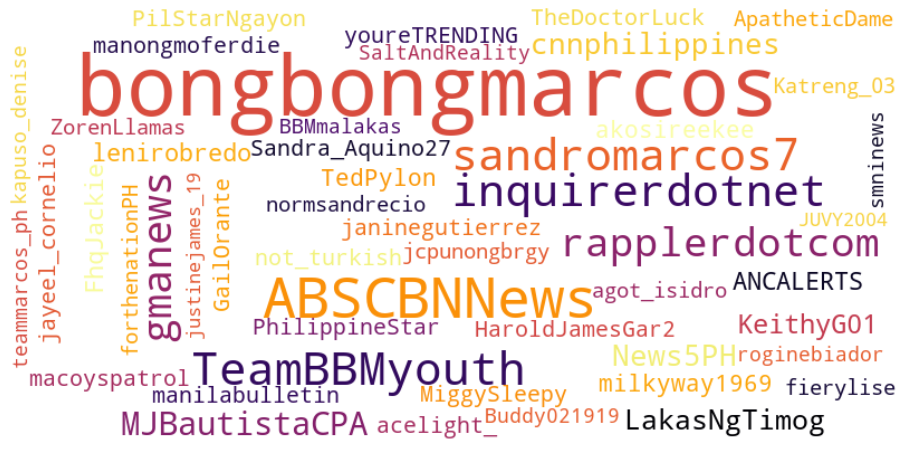

In [68]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", max_words=50, 
                       stopwords=[], collocations=False, colormap="inferno").generate(all_in_mentioned)
plt.figure(figsize=(16,12))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()